<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Start Here

from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

import spacy

import pandas as pd

In [9]:
%pwd

'/Users/jonathansokoll/Documents/lambda_student/DS-Unit-4-Sprint-1-NLP/module4-topic-modeling'

In [8]:
%ls ../module1-text-data/data

Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip
yelp_coffeeshop_review_data.csv


In [54]:
df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [11]:
df.shape

(28332, 24)

In [13]:
# Subset to just one product or Category here

## Get Tokens

In [15]:
nlp = spacy.load("en_core_web_lg")

In [20]:
tokens = []

for doc in nlp.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())
            
    tokens.append(doc_tokens)
        
df['tokens'] = tokens

del tokens

# Create id2word


In [21]:
id2word = Dictionary(df['tokens'])
print(len(id2word))

8876


In [23]:
id2word.filter_extremes(no_below=5, no_above=.98)
print(len(id2word))

2952


## Create Corpus Object

In [24]:
corpus = [id2word.doc2bow(d) for d in df['tokens']]

## Evaluate Number of Topics

In [25]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        print(f"=== Pass {iter_ + 1} of {passes} ===")
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12, passes=5)
            print(f"Model with {num_topics} topics completed.")
            
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })
        print('\n')
        

    return coherence_values

In [32]:
# Can take a long time to run.
coherence_values2 = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=20, 
                                                        limit=41, 
                                                        step=2,
                                                        passes=4)

=== Pass 1 of 4 ===
Model with 20 topics completed.
Model with 22 topics completed.


Process ForkPoolWorker-1226:
Process ForkPoolWorker-1234:
Process ForkPoolWorker-1232:
Process ForkPoolWorker-1235:
Process ForkPoolWorker-1229:
Process ForkPoolWorker-1233:
Process ForkPoolWorker-1227:
Process ForkPoolWorker-1225:
Process ForkPoolWorker-1228:
Process ForkPoolWorker-1230:
Process ForkPoolWorker-1236:
Process ForkPoolWorker-1231:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/multiprocessing/process.py

KeyboardInterrupt: 

In [27]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [29]:
topic_coherence.tail()

,coherence_score,num_topics,pass
95,-2.654127,51,9
96,-2.660988,61,9
97,-2.709395,71,9
98,-2.824009,81,9
99,-2.866016,91,9


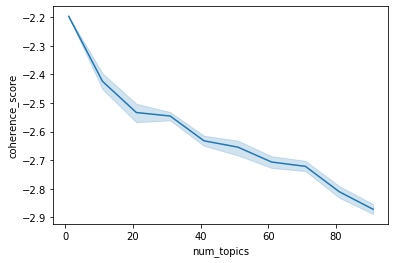

In [31]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [ ]:
# Steps to Score New Documents

"""
1. Tokenize Them (Same way you did training data)
2. Create the bag of words representations
3. Create the corpus object (Steps 2&3 pretty much same thing)
4. Loop of the new docs and score them using lda[doc]
"""



In [33]:
lda = LdaMulticore(corpus=corpus, num_topics=20, id2word=id2word, workers=12, passes=100)

In [34]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [35]:
topics = [' '.join(t[0:5]) for t in words]

In [36]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
kid tablet great friendly user

------ Topic 1 ------
charge buy problem issue time

------ Topic 2 ------
great price tablet recommend buy

------ Topic 3 ------
tablet app need google store

------ Topic 4 ------
good far tablet pretty great

------ Topic 5 ------
game watch movie play tablet

------ Topic 6 ------
amazon device app screen use

------ Topic 7 ------
child time control case set

------ Topic 8 ------
love old year buy tablet

------ Topic 9 ------
easy use size great perfect

------ Topic 10 ------
battery use buy amazon remote

------ Topic 11 ------
like love thing excellent color

------ Topic 12 ------
kindle love light fire reader

------ Topic 13 ------
read book enjoy use email

------ Topic 14 ------
product great good buy price

------ Topic 15 ------
battery good great long price

------ Topic 16 ------
fire tablet hd screen 8

------ Topic 17 ------
card memory storage gb $

------ Topic 18 ------
work great fine time buy

------ Topic

In [38]:
# Steps to Score Training Documents
# Already have BOW Represented called 'corpus'

distro = [lda[d] for d in corpus]
num_topics = 20

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            # Topic is Tuple where the first part is the topic id
            # the second part is the topic distribution in that doc
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [40]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.124015  0.203823       1        1  12.456190
15     0.293981 -0.005628       2        1  10.783484
8     -0.228175 -0.040243       3        1   6.338711
6      0.018157  0.147496       4        1   5.945345
9     -0.125694 -0.066905       5        1   5.079892
5     -0.114582 -0.069261       6        1   4.983617
12    -0.094756  0.034039       7        1   4.796317
16     0.041908 -0.118282       8        1   4.788865
14     0.213674 -0.056678       9        1   4.430890
0     -0.066820 -0.085704      10        1   4.372177
2      0.152057 -0.232112      11        1   4.336695
3      0.054372 -0.031614      12        1   4.144768
7     -0.144024  0.049763      13        1   3.905423
19    -0.136515 -0.028574      14        1   3.739729
1     -0.009818  0.236475      15        1   3.724529
13    -0.165562  0.008477      16        1   3.554004
17     0.142116 -0.047503      17        1   3.352423
18     0.110149  0.237915      18        1   3.267287
4      0.064354 -0.156158      19        1   3.236629
11    -0.128835  0.020674      20        1   2.763021, topic_info=     Category         Freq         Term        Total  loglift  logprob
3     Default  9297.000000      battery  9297.000000  30.0000  30.0000
9     Default  4265.000000         work  4265.000000  29.0000  29.0000
32    Default  6582.000000         good  6582.000000  28.0000  28.0000
31    Default  3356.000000         easy  3356.000000  27.0000  27.0000
1765  Default  3392.000000       kindle  3392.000000  26.0000  26.0000
168   Default  2802.000000          kid  2802.000000  25.0000  25.0000
17    Default  4832.000000        price  4832.000000  24.0000  24.0000
13    Default  2236.000000      product  2236.000000  23.0000  23.0000
82    Default  6036.000000         love  6036.000000  22.0000  22.0000
2032  Default  7911.000000       tablet  7911.000000  21.0000  21.0000
481   Default  2473.000000          old  2473.000000  20.0000  20.0000
20    Default  9059.000000        great  9059.000000  19.0000  19.0000
86    Default  4901.000000          use  4901.000000  18.0000  18.0000
706   Default  2115.000000         read  2115.000000  17.0000  17.0000
95    Default  2244.000000         year  2244.000000  16.0000  16.0000
1098  Default  1882.000000         book  1882.000000  15.0000  15.0000
712   Default  2295.000000         fire  2295.000000  14.0000  14.0000
122   Default  1223.000000         gift  1223.000000  13.0000  13.0000
160   Default  1967.000000         game  1967.000000  12.0000  12.0000
27    Default  5824.000000          buy  5824.000000  11.0000  11.0000
148   Default  1213.000000    recommend  1213.000000  10.0000  10.0000
18    Default  1940.000000        brand  1940.000000   9.0000   9.0000
22    Default  2547.000000         long  2547.000000   8.0000   8.0000
201   Default   927.000000       charge   927.000000   7.0000   7.0000
1326  Default  2497.000000          app  2497.000000   6.0000   6.0000
29    Default   913.000000    christmas   913.000000   5.0000   5.0000
1564  Default   849.000000        watch   849.000000   4.0000   4.0000
171   Default  1115.000000          far  1115.000000   3.0000   3.0000
385   Default  1648.000000         play  1648.000000   2.0000   2.0000
117   Default   973.000000         size   973.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
502   Topic20   103.908951         glad   209.207199   2.8890  -4.4397
167   Topic20    93.129707        grand   194.078217   2.8546  -4.5493
229   Topic20   236.500381    excellent   695.030701   2.5108  -3.6173
627   Topic20    38.298634        timer    60.373638   3.1337  -5.4378
97    Topic20   279.005402        thing  1044.988892   2.2683  -3.4520
2099  Topic20    21.199059         wide    28.250134   3.3017  -6.0293
12    Topic20   515.429626         like  2894.679932   1.8632  -2.8383


In [44]:
list(df)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs',
 'tokens']

In [42]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [43]:
# What the most topics associated with Electronics? 

In [ ]:
# How are topics correlated with rating? 

In [45]:
# Topics by User

df['reviews.username'].nunique()

16269

In [50]:
# Are certin topics more helpful?

df['reviews.numHelpful'].describe()

count    16115.000000
mean         0.529321
std          9.345017
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        621.000000
Name: reviews.numHelpful, dtype: float64

In [66]:
# Continuous Variable

# Bin - using boxplot of upvotes per topic? 

topics_df = pd.DataFrame.from_records(new_distro)
topics_df.columns = topics

In [67]:
topics_df.head()

,kid tablet great friendly user,charge buy problem issue time,great price tablet recommend buy,tablet app need google store,good far tablet pretty great,game watch movie play tablet,amazon device app screen use,child time control case set,love old year buy tablet,easy use size great perfect,battery use buy amazon remote,like love thing excellent color,kindle love light fire reader,read book enjoy use email,product great good buy price,battery good great long price,fire tablet hd screen 8,card memory storage gb $,work great fine time buy,gift buy love christmas purchase
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.58268,0.0000,0.0000,0.0000,0.226208,0.000000,0.0000,0.0000,0.113822,0.000000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.201126,0.648869,0.0000,0.0000,0.000000,0.000000
2,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.01250,0.0125,0.0125,0.0125,0.012500,0.512498,0.0125,0.0125,0.012500,0.262499
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.000000,0.841666,0.0000,0.0000,0.000000,0.000000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.000000,0.841666,0.0000,0.0000,0.000000,0.000000


In [68]:
topics_df['primaryTopic'] = topics_df.idxmax(axis=1)

In [69]:
topics_df['primaryTopic'].value_counts()

battery good great long price       5410
battery use buy amazon remote       2861
love old year buy tablet            2050
great price tablet recommend buy    1957
easy use size great perfect         1436
gift buy love christmas purchase    1405
product great good buy price        1293
good far tablet pretty great        1211
fire tablet hd screen 8             1210
kid tablet great friendly user      1196
game watch movie play tablet        1149
kindle love light fire reader       1093
work great fine time buy            1028
tablet app need google store         861
amazon device app screen use         818
read book enjoy use email            791
child time control case set          750
card memory storage gb $             651
like love thing excellent color      617
charge buy problem issue time        545
Name: primaryTopic, dtype: int64

In [70]:
topics_df['numHelpful'] = df['reviews.numHelpful']

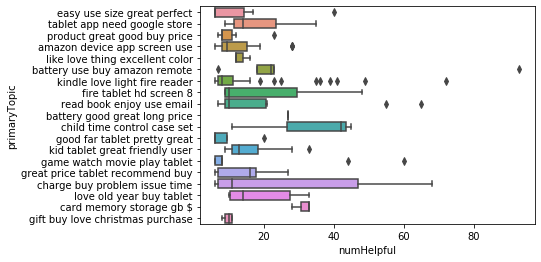

In [79]:
sns.boxplot(x="numHelpful", y="primaryTopic",  data=topics_df[(topics_df['numHelpful'] > 5) & (topics_df['numHelpful'] < 100)]);

In [86]:
# Which topics has the highest total number of helpful upvotes?
# Control for some way by the number of reviews

# Group by with two columns primaryTopic & Upvote
sample = topics_df[['primaryTopic', 'numHelpful']]

sample.groupby('primaryTopic').mean().sort_values(by='numHelpful', ascending=False)

,numHelpful
primaryTopic,
battery use buy amazon remote,3.152318
amazon device app screen use,2.901907
charge buy problem issue time,1.842500
work great fine time buy,1.608696
kindle love light fire reader,1.338904
product great good buy price,1.230643
read book enjoy use email,0.527062
card memory storage gb $,0.357143
tablet app need google store,0.353017


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling